# **ANÁLISE DAS EDIFICAÇÕES RELIGIOSAS EM ALAGOAS**
**Por:** **Lucas Falcão**  
[GitHub](https://github.com/Falkzera)  
[Instagram](https://www.instagram.com/falkzera/)

### RESUMO
O presente notebook busca realizar uma análise das edificações de AGROPECUÁRIAS em Alagoas, filtrando a base de dados do IBGE (2022) e buscando identificar o domínio de cada edificação. Utilizando técnicas de processamento e categorização de dados.  
  
Para alcançar esse objetivo, o notebook emprega um dicinário para determinar a classificação de cada edificação com base nos nomes das cadastrados da edificação. Após a categorização, os dados são organizados e salvos em um arquivo Excel para facilitar a visualização e análise futura.  
  
A parte de análise da segmentação está sujeita a alterações a qualquer momento, conforme novas informações ou melhorias no processamento dos dados. O notebook também visa proporcionar uma compreensão mais profunda da distribuição e características das edificações.
  
Também está presente a visualização gráfica dos dados, como também um mapa interativo que poderá ter atualizações e melhorias futuras.

# 1. Importação, Filtros e Organização

#### Base de dados retirados do IBGE
Cadastro Nacional de Endereços para Fins Estatísticos  
[Base de Dados](https://www.ibge.gov.br/estatisticas/sociais/populacao/38734-cadastro-nacional-de-enderecos-para-fins-estatisticos.html?=&t=resultados)

#### Importação das bibliotecas necessárias

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from folium.plugins import MarkerCluster, HeatMap
import folium

In [46]:
data_original = pd.read_csv(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\IBGE\CENSO_2022\27_AL.csv', sep=';') # Carregando o senso 2022
data_original.shape

C:\Users\lucas\AppData\Local\Temp\ipykernel_21412\2412661677.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_original = pd.read_csv(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\IBGE\CENSO_2022\27_AL.csv', sep=';') # Carregando o senso 2022


(1626565, 34)

### Filtrando todas as edificações estabelecidas no senso de 2022

In [47]:
# Por categoria COD_ESPECIE
'''
1=Domicílio particular
2=Domicílio coletivo
3=Estabelecimento agropecuário
4=Estabelecimento de ensino
5=Estabelecimento de saúde
6=Estabelecimento de outras finalidades
7=Edificação em construção ou reforma
8=Estabelecimento religioso
'''
data_01 = data_original[data_original['COD_ESPECIE'] == 1] # Domicílio particular
data_02 = data_original[data_original['COD_ESPECIE'] == 2] # Domicílio coletivo
data_03 = data_original[data_original['COD_ESPECIE'] == 3] # Estabelecimento agropecuário
data_04 = data_original[data_original['COD_ESPECIE'] == 4] # Estabelecimento de ensino
data_05 = data_original[data_original['COD_ESPECIE'] == 5] # Estabelecimento de saúde
data_06 = data_original[data_original['COD_ESPECIE'] == 6] # Estabelecimento de outras finalidades
data_07 = data_original[data_original['COD_ESPECIE'] == 7] # Edificação em construção ou reforma
data_08 = data_original[data_original['COD_ESPECIE'] == 8] # Estabelecimento religioso

### Coletando os nomes dos Municípios através de seus códigos
Os [códigos dos Municipíos](https://www.ibge.gov.br/explica/codigos-dos-municipios.php) são definidos pelo IBGE
  
Como a base de dados incial não possuí a nomeclatura dos Municípios, foi necessário importa-lós


#### Filtrando o novo Dataframe

In [48]:
data_nomes = pd.read_excel(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\IBGE\CENSO_2022\RELATORIO_DTB_BRASIL_MUNICIPIO.xls')
data_uf = data_nomes.copy()

data_uf = data_nomes[data_nomes['Nome_UF'] == 'Alagoas'] # Selecionando apenas os municípios de Alagoas

### Concatenando os DataFrames
Concatenando os Dataframes para conseguir o nome do Município através de seu código

In [49]:
# Concatenar uma planilha com outra, colocando na mesma linha o #COD_MUNICIPIO e o # Código Município Completo
data_01_uf = pd.merge(data_01, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_02_uf = pd.merge(data_02, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_03_uf = pd.merge(data_03, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_04_uf = pd.merge(data_04, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_05_uf = pd.merge(data_05, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_06_uf = pd.merge(data_06, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_07_uf = pd.merge(data_07, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_08_uf = pd.merge(data_08, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')

# Para salvar e utilizar em outro projeto.
# data_xx_uf.to_csv('Coordenadas_AL.csv', sep=';', index=False)

In [50]:
resultado_final = data_03_uf.copy()
resultado_final.shape

(48996, 47)

### Ordenando o Dataframe e organizando as colunas necessárias

In [51]:
# Colocar em ordem alfabetica o Nome_Municipio
resultado_final = resultado_final.sort_values('Nome_Município')

nova_ordem = ['Nome_Mesorregião', 'COD_MUNICIPIO' ,'LATITUDE', 'LONGITUDE' ,'Nome_Município', 'CEP', 'DSC_LOCALIDADE', 'DSC_ESTABELECIMENTO', ]
resultado_final = resultado_final[nova_ordem]

# Renomeando colunas
resultado_final = resultado_final.rename(columns={
    'Nome_Município': 'MUNICÍPIO',
    'CEP': 'CEP',
    'DSC_LOCALIDADE': 'BAIRRO',
    'DSC_ESTABELECIMENTO': 'EDIFICAÇÃO PRODUTIVA',
    'LATITUDE': 'LATITUDE',
    'LONGITUDE': 'LONGITUDE',
    'Nome_Mesorregião': 'REGIÃO',
    'COD_MUNICIPIO': 'CD_MUN'
})

resultado_final.head(4)

,REGIÃO,CD_MUN,LATITUDE,LONGITUDE,MUNICÍPIO,CEP,BAIRRO,EDIFICAÇÃO PRODUTIVA
25911,Leste Alagoano,2700201,-9.609929,-36.390605,Anadia,57660000,SITIO LIMOEIRINHO,CURRAL
41541,Leste Alagoano,2700201,-9.714963,-36.267210,Anadia,57660000,JERIMUM,CURRAL
41540,Leste Alagoano,2700201,-9.710205,-36.272510,Anadia,57660000,JERIMUM,CURRAL
41539,Leste Alagoano,2700201,-9.708476,-36.271187,Anadia,57660000,JERIMUM,CURRAL


In [52]:
# # Dicionários para diferentes tipos de igrejas
# dicionario_municipal = {
#     'Municipal': [
#         'municipal', 'prefeitura', 'municipais', 'prefeituras', 'municipalidade', 'prefeitura'

        
#     ]
# }

# dicionario_estadual = {
#     'Estadual': [
#         'estadual', 'governo estadual', 'governo do estado', 'governo estadual', 'governo do estado', 'governo estadual', 'governo do estado',
        
#     ]
# }

# dicionario_federal = {
#     'Federal': [
#         'federal', 'governo federal', 'governo da uniao', 'governo do brasil', 'governo federal', 'governo da uniao', 'governo do brasil',
        
#     ]
# }

# dicionario_privado = {
#     'Privado': [
#         'escola', 'espaço'

#     ]
# }

In [53]:

# # Função para identificar o tipo de igreja usando os dicionários
# def identificar_igreja(nome):
#     nome = nome.lower()
#     for tipo, palavras in dicionario_municipal.items():
#         if any(palavra in nome for palavra in palavras):
#             return tipo
#     for tipo, palavras in dicionario_estadual.items():
#         if any(palavra in nome for palavra in palavras):
#             return tipo
#     for tipo, palavras in dicionario_federal.items():
#         if any(palavra in nome for palavra in palavras):
#             return tipo
#     for tipo, palavras in dicionario_privado.items():
#         if any(palavra in nome for palavra in palavras):
#             return tipo
#     return 'Outros'

# # Aplicar a função ao DataFrame
# resultado_final['ENSINO'] = resultado_final['EDIFICAÇÃO DE ENSINO'].apply(identificar_igreja)

# # Ordenar o DataFrame em ordem alfabética pela coluna 'EDIFICAÇÃO_RELIGIOSA'
# resultado_final.sort_values(by='MUNICÍPIO')

# # Resetar o índice do DataFrame resultante
# resultado_final.reset_index(drop=True, inplace=True)

In [54]:
# apenas_outros = resultado_final[resultado_final['ENSINO'] == 'Outros']
# apenas_outros.shape # A quantidade de linhas representa a quantidade de edificações religiosas que não foram classificadas

#### Exportação para arquivo Excel

In [55]:
resultado_final['EDIFICAÇÃO PRODUTIVA'].unique()

array(['CURRAL', 'GRANJA', 'BAIA DE CAVALO', ..., 'GRANGA',
       'FAZENDA DO NILSON', 'CRIACAO DE BOVINOS DO AMARAL'], dtype=object)

In [56]:
resultado_final.to_excel('Edificacoes_AGRO_AL.xlsx') # Salvando em Excel

### Definição por quantidade

In [57]:
# Supondo que resultado_final é o seu DataFrame original
por_grupo = resultado_final.copy()

# Contando a quantidade de escolas por município
por_grupo = por_grupo.groupby('MUNICÍPIO').size().reset_index(name='Quantidade Localidades Agropecuárias')

# Salvando em Excel
with pd.ExcelWriter('Edificacoes_AGRO_AL.xlsx', mode='a', engine='openpyxl') as writer:
    por_grupo.to_excel(writer, sheet_name='Por_grupo', index=False)

# 2. Vizualização gráfica

In [58]:
# Definição das palhetas de Cores:
cores_pet_1 = ['#0b4754', '#54180b', '#9a6233', '#ffdd63']
cores_pet_2 = ['#148098', '#116d81', '#0e5a6b', '#0b4754', '#08343d', '#052127', '#020e10']


In [59]:
resultado_final

,REGIÃO,CD_MUN,LATITUDE,LONGITUDE,MUNICÍPIO,CEP,BAIRRO,EDIFICAÇÃO PRODUTIVA
25911,Leste Alagoano,2700201,-9.609929,-36.390605,Anadia,57660000,SITIO LIMOEIRINHO,CURRAL
41541,Leste Alagoano,2700201,-9.714963,-36.267210,Anadia,57660000,JERIMUM,CURRAL
41540,Leste Alagoano,2700201,-9.710205,-36.272510,Anadia,57660000,JERIMUM,CURRAL
41539,Leste Alagoano,2700201,-9.708476,-36.271187,Anadia,57660000,JERIMUM,CURRAL
41538,Leste Alagoano,2700201,-9.693787,-36.286752,Anadia,57660000,MARACUJA,GRANJA
...,...,...,...,...,...,...,...,...
1130,Sertão Alagoano,2700102,-9.249779,-37.929617,Água Branca,57490000,TATAJUBA,NaN
1131,Sertão Alagoano,2700102,-9.250533,-37.929460,Água Branca,57490000,TATAJUBA,NaN
1132,Sertão Alagoano,2700102,-9.251061,-37.929384,Água Branca,57490000,TATAJUBA,NaN
1125,Sertão Alagoano,2700102,-9.217381,-37.920033,Água Branca,57490000,FAZENDA SANTA RITA,CRIACAO DE BOVINOS


# 3. Visualizações Interativas

In [60]:
df_agro = resultado_final.copy()

In [61]:
# Biblioteca necessárias
import geopandas as gpd
import matplotlib.pyplot as plt

In [62]:
# Lendo o arquivo shapefile
data = gpd.read_file(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\Mapas_shp\AL_Municipios_2022.shp')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2700102,Água Branca,AL,468.229,"POLYGON ((-37.80251 -9.32908, -37.80252 -9.328..."
1,2700201,Anadia,AL,186.134,"POLYGON ((-36.3209 -9.61012, -36.32087 -9.6101..."
2,2700300,Arapiraca,AL,345.655,"POLYGON ((-36.66698 -9.81639, -36.66702 -9.816..."
3,2700409,Atalaia,AL,533.258,"POLYGON ((-36.05322 -9.42406, -36.0531 -9.4240..."
4,2700508,Barra de Santo Antônio,AL,131.364,"POLYGON ((-35.48203 -9.34808, -35.47249 -9.358..."
...,...,...,...,...,...
97,2709103,Taquarana,AL,153.841,"POLYGON ((-36.40766 -9.65776, -36.428 -9.66357..."
98,2709152,Teotônio Vilela,AL,299.221,"POLYGON ((-36.34807 -9.88157, -36.33942 -9.882..."
99,2709202,Traipu,AL,681.577,"POLYGON ((-36.95589 -10.01342, -36.9559 -10.01..."
100,2709301,União dos Palmares,AL,420.376,"POLYGON ((-36.04587 -9.06433, -36.04581 -9.064..."


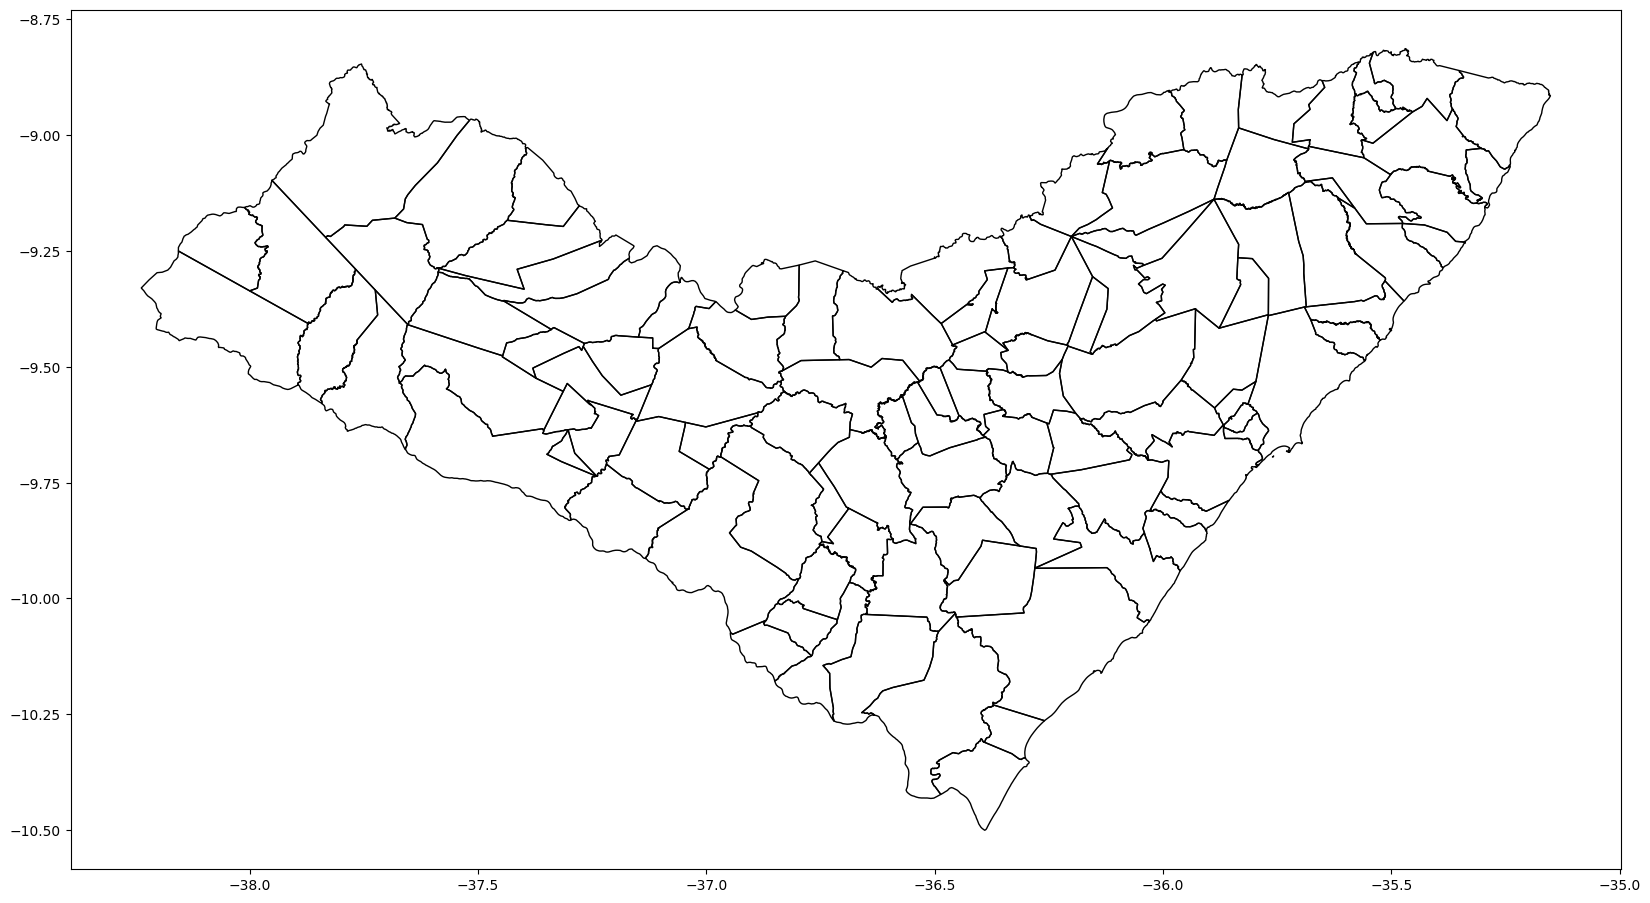

In [63]:
# Visualizando o mapa
data.plot(figsize=(20, 20), facecolor='none', edgecolor='black')
data

In [64]:
# Filtrar apenas os municípios de Alagoas
gdf_mcz = data[data['NM_MUN'] == 'Maceió']
gdf_mcz

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
46,2704302,Maceió,AL,509.32,"MULTIPOLYGON (((-35.79523 -9.52383, -35.78579 ..."


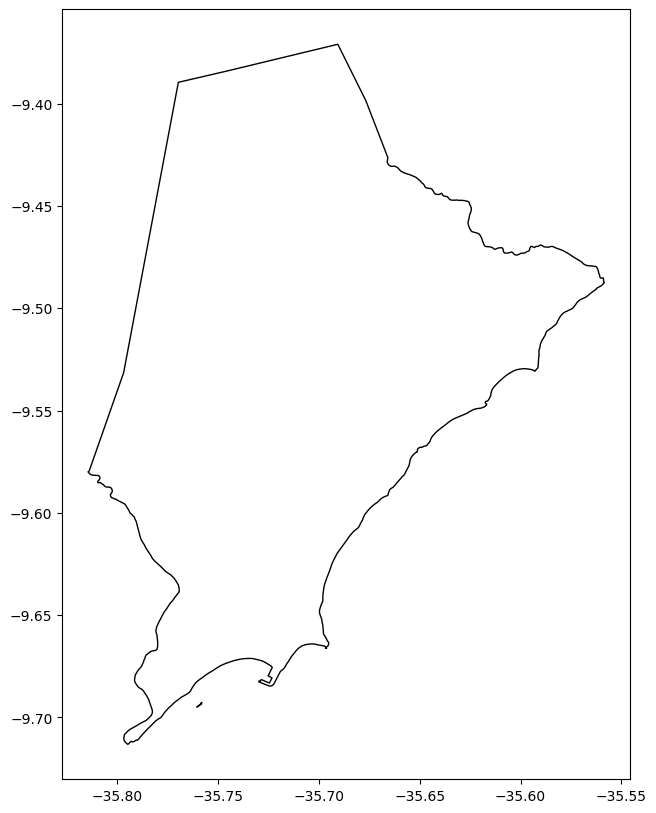

In [65]:
# Plotar o mapa de Maceió
gdf_mcz.plot(figsize=(10, 10), facecolor='none', edgecolor='black')
plt.show()

In [66]:
# Salvando os dados
gdf_al = data.copy() # Uma copia com todos os municípios

# Salvando
gdf_al.to_file('alagoas.json', driver='GeoJSON')
gdf_mcz.to_file('maceio.json', driver='GeoJSON')

# Carregando o Arquivo Igrejas

In [67]:
df_agro.columns

Index(['REGIÃO', 'CD_MUN', 'LATITUDE', 'LONGITUDE', 'MUNICÍPIO', 'CEP',
       'BAIRRO', 'EDIFICAÇÃO PRODUTIVA'],
      dtype='object')

In [68]:
# Mostrando os dados de Lagitude e Longitude
'''
IMPORTANTE:
VERIFICAR SE POSSUIS DADOS 'NAN'. 
EM CASO POSITIVO, DROPAR TODOS.
'''
df_agro[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
25911,-9.609929,-36.390605
41541,-9.714963,-36.267210
41540,-9.710205,-36.272510
41539,-9.708476,-36.271187
41538,-9.693787,-36.286752
...,...,...
1130,-9.249779,-37.929617
1131,-9.250533,-37.929460
1132,-9.251061,-37.929384
1125,-9.217381,-37.920033


### Criando um GeoDataFrame

In [69]:
# Criando a coluna geometry
df_agro['geometry'] = None
# Aidicionando a longitude.
# Pode utilizar esse código:
# df_igrejas['geometry'] = resultado_final.apply(lambda x: Point((float(x.LONGITUDE), float(x.LATITUDE))), axis=1) # Mais rápido
# Ou esse:
for index, row in df_agro.iterrows():
    df_agro.loc[index, 'geometry'] = Point(row['LONGITUDE'], row['LATITUDE']) # Mais lento

In [70]:
# O tipo de df_igrejas ainda está como DataFrame. Será necessário a conversão para GeoDataFrame
type(df_agro)

pandas.core.frame.DataFrame

In [71]:
# Convertendo para GeoDataFrame
gdf_agro = gpd.GeoDataFrame(df_agro, geometry='geometry')
# Verificando a conversão
type(df_agro)

pandas.core.frame.DataFrame

<Axes: >

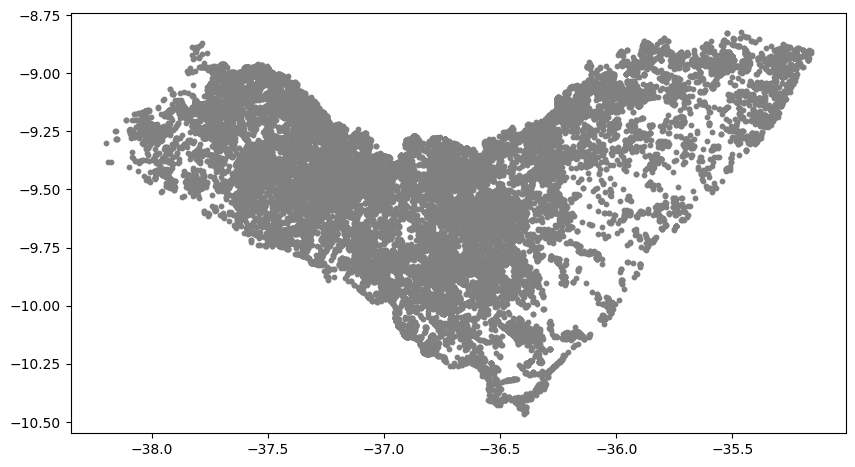

In [72]:
# Plotando o DF Igrejas
gdf_agro.plot(figsize=(10, 10), markersize=10, color='grey')

# PLOTAGEM DE MAPAS

#### Em ALAGOAS

Text(0.5, 1.0, 'Edificações Agropecuárias em Alagoas')

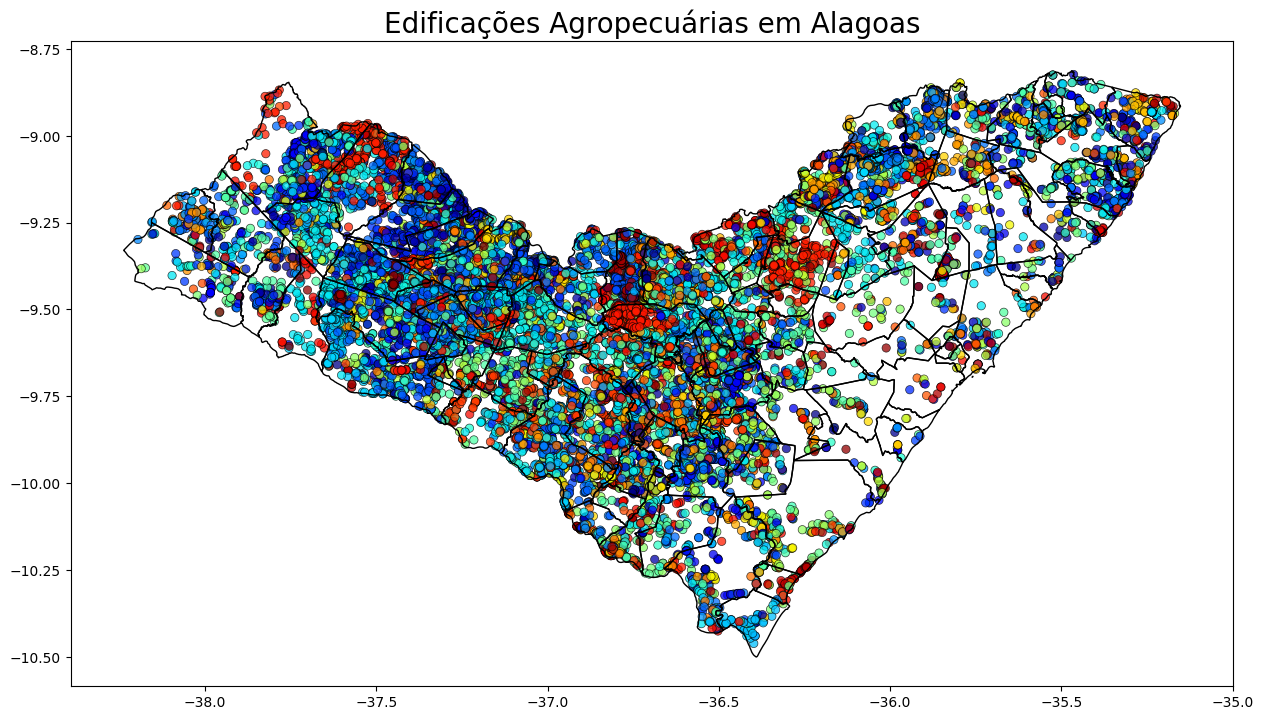

In [73]:
# Mostrando os dados com MatPlot
fig, ax = plt.subplots(figsize = (15, 15))

gdf_agro.plot(ax=ax,
                 column='EDIFICAÇÃO PRODUTIVA', # Coluna que será usada para colorir os pontos
                 legend=False, # Mostrar a legenda
                 legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'title': 'ENSINO'}, # Configurações da legenda
                 cmap='jet', # Cor dos pontos
                 edgecolor='black', # Cor da borda das fronteiras
                 linewidth=0.5, # Largura da borda
                 alpha=0.75) # Transparência dos pontos
gdf_al.plot(ax = ax, facecolor = 'none', edgecolor = 'black') # Colocando o mapa de ALAGOAS pode ser o de MCZ
plt.title('Edificações Agropecuárias em Alagoas', fontsize=20) # Título

### Em Maceió

In [74]:
polygon_mcz = gdf_mcz.iloc[0].geometry # Pode ser o de Maceió

In [75]:
# Operação de intersecção
gdf_agro_mcz = gdf_agro[gdf_agro.intersects(polygon_mcz)] # Para alagoas é gdf_igrejas

Text(0.5, 1.0, 'Edificações Agropecuárias em Maceió')

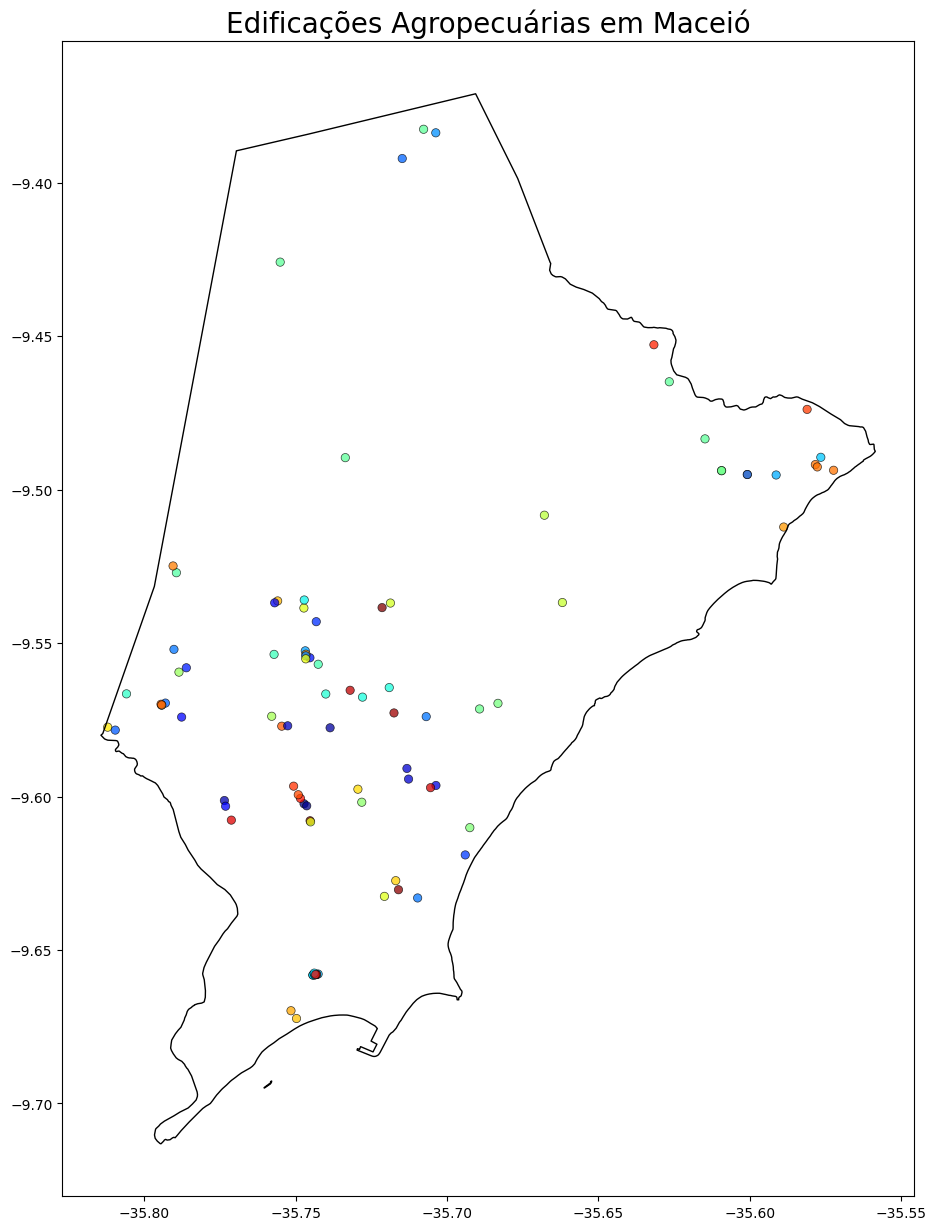

In [76]:
# Visualizando
fig, ax = plt.subplots(figsize = (15, 15))

gdf_agro_mcz.plot(ax=ax,
                 column='EDIFICAÇÃO PRODUTIVA', # Coluna que será usada para colorir os pontos
                 legend=False, # Mostrar a legenda
                 legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'title': 'ENSINO'}, # Configurações da legenda
                 cmap='jet', # Cor dos pontos
                 edgecolor='black', # Cor da borda das fronteiras
                 linewidth=0.5, # Largura da borda
                 alpha=0.75) # Transparência dos pontos
gdf_mcz.plot(ax = ax, facecolor = 'none', edgecolor = 'black') # Colocando o mapa de ALAGOAS pode ser o de MCZ
plt.title('Edificações Agropecuárias em Maceió', fontsize=20) # Título

# MAPAS INTERATIVOS

# Criando agrupamentos (clusters) e Melhorando a visualização

In [77]:
# Criando o mapa
fmap = folium.Map(location=[gdf_agro['LATITUDE'].mean(), gdf_agro['LONGITUDE'].mean()], zoom_start=8)

# Criando o cluster de marcadores
mc = MarkerCluster()

# Adicionando os marcadores ao cluster com popups personalizados
for idx, row in gdf_agro.iterrows():
    popup_content = f"""
    <strong>{row['EDIFICAÇÃO PRODUTIVA']}</strong><br>
    EDIFICAÇÃO PRODUTIVA: {row['EDIFICAÇÃO PRODUTIVA']}<br>
    Bairro: {row['BAIRRO']}<br>
    Município: {row['MUNICÍPIO']}<br>
    Latitude: {row['LATITUDE']}<br>
    Longitude: {row['LONGITUDE']}
    """
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(mc)

# Adicionando o cluster ao mapa
mc.add_to(fmap)

# Definindo os limites do mapa e outras customizações
limites = folium.features.GeoJson(gdf_al,
                                  style_function=lambda feature: {
                                      'color': 'grey',
                                      'weight': 2,
                                      'fillOpacity': 0.0
                                  })

# Adicionando os limites ao mapa
fmap.add_child(limites)

# Salvando o mapa em um arquivo HTML
fmap.save('Mapa_Interativo_AGRO_AL.html')


# Criação de mapa de calor (HeatMap)

In [78]:
# Criando o mapa
fmap = folium.Map(location=[gdf_agro['LATITUDE'].mean(), gdf_agro['LONGITUDE'].mean()], zoom_start=8) # Criando o mapa

# Criando e adicionando o mapa de calor
heat_map = HeatMap(data=gdf_agro[['LATITUDE', 'LONGITUDE']].values, radius=15) # Criando o mapa de calor
fmap.add_child(heat_map)

# Criando o cluster de marcadores
mc = MarkerCluster() # Criando o cluster para os marcadores e popups

# Adicionando os marcadores ao cluster com popups personalizados
for idx, row in gdf_agro.iterrows():
    popup_content = f"""
    <strong>{row['EDIFICAÇÃO PRODUTIVA']}</strong><br>
    EDIFICAÇÃO PRODUTIVA: {row['EDIFICAÇÃO PRODUTIVA']}<br>
    Bairro: {row['BAIRRO']}<br>
    Município: {row['MUNICÍPIO']}<br>
    Latitude: {row['LATITUDE']}<br>
    Longitude: {row['LONGITUDE']}
    """
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(mc)

# Adicionando o cluster ao mapa
mc.add_to(fmap)

# Definindo os limites do mapa e outras customizações
limites = folium.features.GeoJson(gdf_al,
                                  style_function=lambda feature: {
                                      'color': 'grey',
                                      'weight': 2,
                                      'fillOpacity': 0.0
                                  })

# Adicionando os limites ao mapa
fmap.add_child(limites)

# Salvando o mapa em um arquivo HTML
fmap.save('Mapa_Interativo_Calor_AGRO_AL.html')